In [2]:
import csv as csv
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from c_online_linear_regression import getData, reaggregate, lookupSales, linear_regress

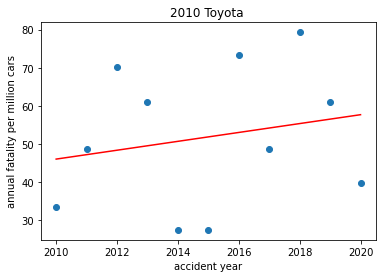

2010 Toyota 
Slope 1.1647758472081302 intercept -2295.163074165357
Initial fatality rate is 46.03637872298441 per year
year 2010 of sales 327804 used
normalized annual fatality rate of 46.03637872298441


<Figure size 432x288 with 0 Axes>

In [8]:
# An example to analyze for: 1999 Toyota (49) Camry (40)


dfMasterCrashAgg, dfSales = getData()  # Retrieve pre-aggregated crash and sales data

year, sales = lookupSales(dfSales, Sales_Year=2010, Make_ID=49, Model_ID=40, verbose=False)
'''
lookupSales(dfSales, Sales_Year=None, Make_ID=None, Model_ID=None, verbose=False )

- Look up sales for M/M/MY

Parameters:
- dfSales: sales dataframe from getData() above
- Sales_Year: the desired sales-year sales.  If sales for Sales_Year is not found,
              the next available Sales_Year will be used.  E.g. since we only have
              2005+ sales data, if Sales_Year=2000, then 2005 sales will be returned
              (provided the make & model has 2005 sales).  If Sales_Year=None, then sales
              will be aggregated over all years
- Make_ID: see NHTSA-FARS-download/make2020.csv.  Set to None to aggregate over all Makes
- Model_ID: see NHTSA-FARS-download/model-lookup/*.csv.  Set to None to aggregate over all
            Models
- verbose: True for more detailed printouts

Returns:
- sales: the sales number.  None if not found.
- year: the year for which the sales number is returned.  Return value is None if
        sales==None or Sales_Year==None
        
NOTE: If any of Sales_Year, Make_ID, Model_ID is None, reaggregation is required.  See next cell.
'''

_,_, fatality = linear_regress(dfMasterCrashAgg,'2010 Toyota Camry' 
                               , "MOD_YEAR==2010 and Make_ID==49 and Model_ID==40 and ACC_YEAR>=MOD_YEAR"
                               , denom=sales, showPlot=True)     
'''
linear_regress(dfCrashAgg, name, filterCondition, denom=None, showPlot=True, savePlot=False)

- Performs scatter plot and linear regression (LR)

Parameters:
- dfMasterCrashAgg: crash dataframe from getData() above
- name: Used in chart title and output file name
- filterCondition: Available variables are MOD_YEAR, Make_ID, Model_ID, ACC_YEAR.  Note:
    the contidion "ACC_YEAR>=MOD_YEAR" should always be included to filter out accidents
    that occur in the year before model year to reduce noise.
- denom:  If supplied, will be used to divide all numbers in the scatter plot (and
    therefore linear regression).  Typically this is the sales volume representing the
    selection in filterCondition
- showPlot: Set to True to display scatter + LR chart

Returns:
- slope: slope of linear regression
- intercept: intercept of linear regression
- initFatality: initial value of the linear regression line
'''

print(f'year {year} of sales {sales} used')
print(f'normalized annual fatality rate of {fatality}')

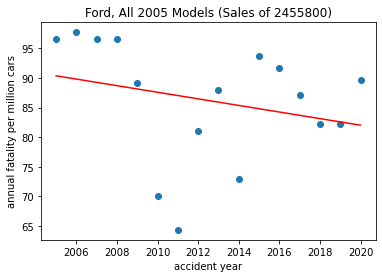

Ford, All 2005 Models (Sales of 2455800)
Slope -0.5563060797247918 intercept 1205.764983735907
Initial fatality rate is 90.37129388769927 per year
year 2005 of sales 2455800 used
normalized annual fatality rate of 90.37129388769927


In [32]:
# 2010, Toyota (49) All models
dfMasterCrashAgg, dfSales = getData()

year, sales = lookupSales(dfSales, Sales_Year=2005, Make_ID=12, Model_ID=None, verbose=False)
#Re-aggregation required if any of Sales_Year, Make_ID, Model_ID is None. 

# REAGGREGATION
dfagg2 = reaggregate(dfMasterCrashAgg, groupBy=['MOD_YEAR', 'Make_ID', 'ACC_YEAR'])
'''
reaggregate( dfCrashAgg, groupBy=None)

Parameters:
- dfMasterCrashAgg: crash dataframe from getData() above
- groupBy: If None, then no further aggregation is done, i.e. use agg level of dfCrashAgg.
           Otherwise groupBy should be list of columns, e.g. ['MOD_YEAR', 'Make_ID', 'ACC_YEAR']

Returns:
- reaggregated dataframe
'''

_,_, fatality = linear_regress(dfagg2,f'Ford, All 2005 Models (Sales of {sales})' 
                               , "MOD_YEAR==2005 and Make_ID==12 and ACC_YEAR>=MOD_YEAR"
                               , denom=sales, showPlot=True)     
print(f'year {year} of sales {sales} used')
print(f'normalized annual fatality rate of {fatality}')

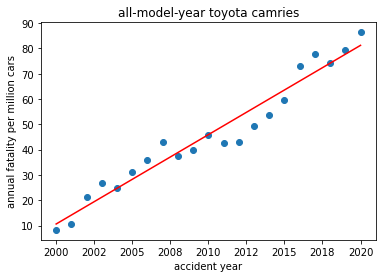

all-model-year toyota camries
Slope 3.5285636751350915 intercept -7046.500418621396
Initial fatality rate is 10.626931648786922 per year
year None of sales 6518601 used
normalized annual fatality rate of 10.626931648786922


In [3]:
# All model years, Toyota (49) Camry (40)
# NOTE: When plotting all model years, the scatter plot will almost always look like a straight
#       line due to new model year vehicles being added each accident year.

dfMasterCrashAgg, dfSales = getData()

year, sales = lookupSales(dfSales, Sales_Year=None, Make_ID=49, Model_ID=40, verbose=False)

dfagg2 = reaggregate(dfMasterCrashAgg, groupBy=['Make_ID', 'Model_ID', 'ACC_YEAR'])

_,_, fatality = linear_regress(dfagg2,'all-model-year toyota camries' 
                               , "Make_ID==49 and Model_ID==40 "
                               , denom=sales, showPlot=True)     
print(f'year {year} of sales {sales} used')
print(f'normalized annual fatality rate of {fatality}')

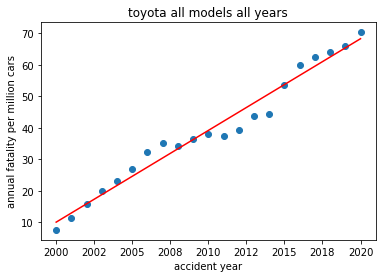

toyota all models all years
Slope 2.9125145464770554 intercept -5815.018483255927
Initial fatality rate is 10.010609698183544 per year
year None of sales 32213874 used
normalized annual fatality rate of 10.010609698183544


In [33]:
# All model years, Toyota (49) All models
# NOTE: When plotting all model years, the scatter plot will almost always look like a straight
#       line due to new model year vehicles being added each accident year.

dfMasterCrashAgg, dfSales = getData()

year, sales = lookupSales(dfSales, Sales_Year=None, Make_ID=49, Model_ID=None, verbose=False)

dfagg2 = reaggregate(dfMasterCrashAgg, groupBy=['Make_ID', 'ACC_YEAR'])

_,_, fatality = linear_regress(dfagg2,'toyota all models all years' 
                               , "Make_ID==49"
                               , denom=sales, showPlot=True)     
print(f'year {year} of sales {sales} used')
print(f'normalized annual fatality rate of {fatality}')